# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [45]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [46]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [47]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [48]:
websites.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

In [49]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP

*1. It has 1781 rows and 21 columns.*

*2. We have integer and floats, also object type.*

*3. All columns except for the "type" column.*

*4. The type column. I assume the type for malicious websites is 1.*

*5. Probably for dates.*

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

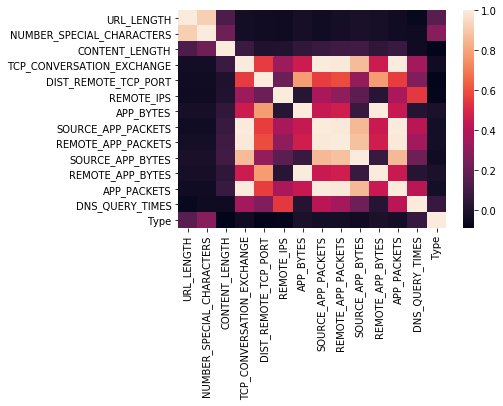

In [50]:
correl=websites.corr()
sns.heatmap(correl)


In [51]:
c = correl.abs()

s = c.unstack()
so = s.sort_values(ascending=False)
so[(so>=0.9)&(so<1)]

REMOTE_APP_BYTES           APP_BYTES                    0.999992
APP_BYTES                  REMOTE_APP_BYTES             0.999992
TCP_CONVERSATION_EXCHANGE  APP_PACKETS                  0.997796
SOURCE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.997796
APP_PACKETS                TCP_CONVERSATION_EXCHANGE    0.997796
TCP_CONVERSATION_EXCHANGE  SOURCE_APP_PACKETS           0.997796
                           REMOTE_APP_PACKETS           0.990848
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
                           SOURCE_APP_PACKETS           0.989285
SOURCE_APP_PACKETS         REMOTE_APP_PACKETS           0.989285
REMOTE_APP_PACKETS         APP_PACKETS                  0.989285
APP_PACKETS                REMOTE_APP_PACKETS           0.989285
NUMBER_SPECIAL_CHARACTERS  URL_LENGTH                   0.917986
URL_LENGTH                 NUMBER_SPECIAL_CHARACTERS    0.917986
dtype: float64

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [52]:
websites = pd.read_csv('../website.csv')

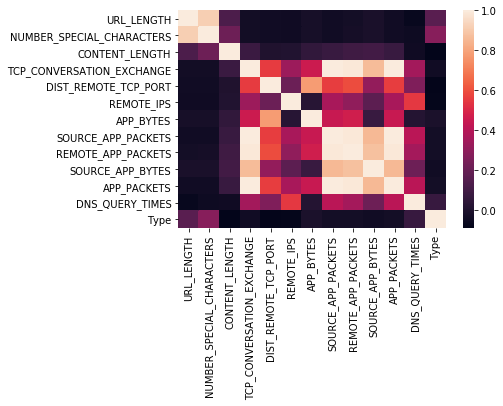

In [53]:
#FIRST REMOVE "REMOTE_APP_BYTES" AS IT'S ALMOST ALWAYS THE SAME AS APP_BYTES:
websites=websites.drop("REMOTE_APP_BYTES",axis=1)
correl=websites.corr()
sns.heatmap(correl)

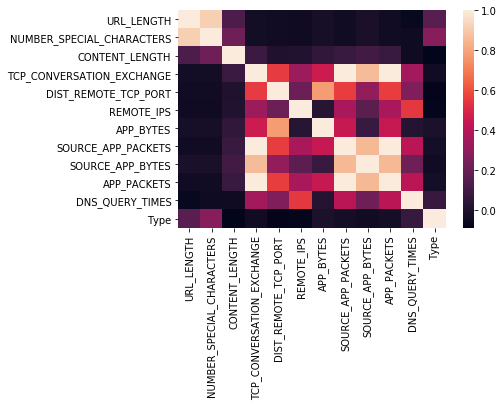

In [54]:
#NOW REMOVE "REMOTE_APP_PACKETS" AND "SOURCE_APP_PACKETS" AS IT'S ALMOST ALWAYS THE SAME AS APP_PACKETS:
websites=websites.drop("REMOTE_APP_PACKETS",axis=1)
correl=websites.corr()
sns.heatmap(correl)

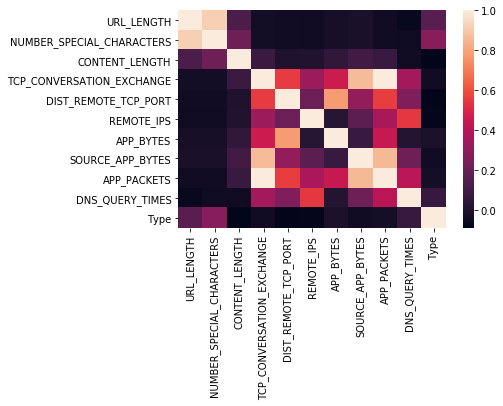

In [55]:
websites=websites.drop("SOURCE_APP_PACKETS",axis=1)
correl=websites.corr()
sns.heatmap(correl)

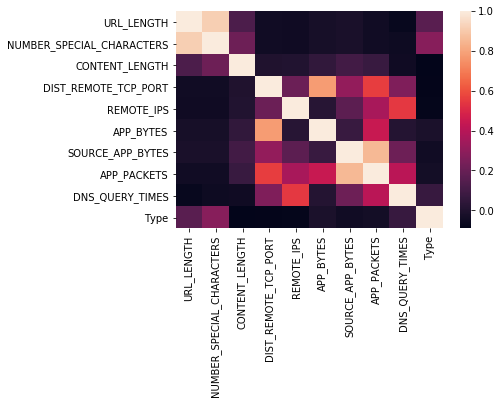

In [56]:
#NOW REMOVE "TCP_CONVERSATION_EXCHANGE" AND "SOURCE_APP_PACKETS" AS IT'S VERY RELATED TO APP_BYTES AND PACKETS:
websites=websites.drop("TCP_CONVERSATION_EXCHANGE",axis=1)
correl=websites.corr()
sns.heatmap(correl)


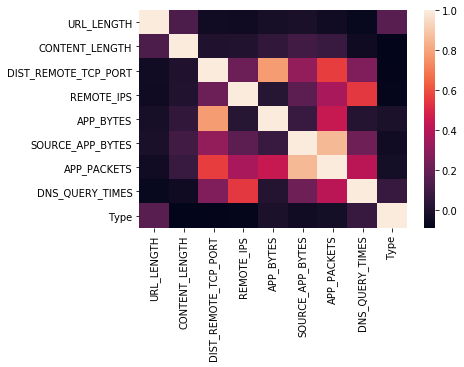

In [57]:
#AT LAST WE REMOVE "NUMBER_SPECIAL_CHARACTERS" AS IT'S VERY RELATED TO URL LENGTH:
websites=websites.drop("NUMBER_SPECIAL_CHARACTERS",axis=1)
correl=websites.corr()
sns.heatmap(correl)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [58]:
websites.isnull().sum()


URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
SOURCE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [59]:
#First let's calculate the ratio of missing values in CONTENT_LENGTH:
websites[websites.CONTENT_LENGTH.isnull()==True].shape[0]/websites.shape[0]


0.45592363840539024

In [60]:
#almost 50%, now we remove this column:
websites=websites.drop("CONTENT_LENGTH",axis=1)

In [61]:
#for the rest, well just remove the rows with null values:
websites=websites.dropna()
websites.isnull().sum()

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [62]:
websites.isnull().sum()


URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [63]:
websites.WHOIS_COUNTRY.value_counts()

US                1102
None               306
CA                  83
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
IN                  10
CN                  10
UK                  10
CZ                   9
FR                   9
NL                   6
CH                   6
KR                   5
[u'GB'; u'UK']       5
ru                   4
AT                   4
BS                   4
PH                   4
KY                   3
us                   3
BE                   3
TR                   3
HK                   3
SC                   3
SE                   3
DE                   3
BR                   2
UA                   2
RU                   2
IL                   2
Cyprus               2
NO                   2
UY                   2
KG                   2
SI                   2
PK                   1
LV                   1
TH                   1
AE                   1
se                   1
UG         

In [64]:
def clean_country(s):
    country=s
    if country in ["United Kingdom","[u'GB'; u'UK']"]: country="GB"
    if country in ["Cyprus"]: country="CY"
    country=country.upper()
    return country

websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.apply(clean_country)
websites.WHOIS_COUNTRY.value_counts()

US      1105
NONE     306
CA        83
ES        63
AU        35
GB        25
PA        21
JP        11
IN        10
UK        10
CN        10
CZ         9
FR         9
RU         6
CH         6
NL         6
KR         5
PH         4
AT         4
BS         4
SE         4
BE         3
DE         3
TR         3
SC         3
KY         3
HK         3
IL         2
BR         2
SI         2
KG         2
UA         2
CY         2
NO         2
UY         2
IT         1
AE         1
LV         1
LU         1
PK         1
IE         1
TH         1
UG         1
BY         1
Name: WHOIS_COUNTRY, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

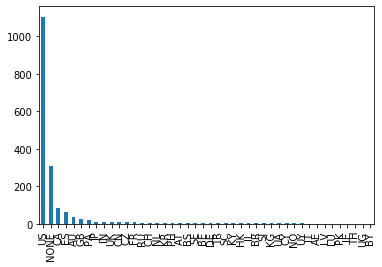

In [65]:
websites.WHOIS_COUNTRY.value_counts().plot.bar()


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [66]:
top=list(websites.WHOIS_COUNTRY.value_counts().index[:10])
def relabel_country(s):
    if s not in top: return "OTHER"
    return s
websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.apply(relabel_country)
websites.WHOIS_COUNTRY.value_counts()


US       1105
NONE      306
OTHER     110
CA         83
ES         63
AU         35
GB         25
PA         21
JP         11
IN         10
UK         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [67]:
websites=websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],axis=1)
websites.head()


,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,NONE,0,2,700,1153,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,NONE,7,4,1230,1265,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,NONE,0,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,US,22,3,3812,18784,39,8.0,0
4,B0_403,17,UTF-8,None,US,2,5,4278,129889,61,4.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [68]:
websites.dtypes


URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [69]:
websites=websites.drop('URL',axis=1)


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [70]:
websites.CHARSET.value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [71]:
websites.SERVER.value_counts().head(10)

Apache                   385
nginx                    211
None                     175
Microsoft-HTTPAPI/2.0    113
cloudflare-nginx          94
Microsoft-IIS/7.5         51
Server                    49
GSE                       49
YouTubeFrontEnd           42
nginx/1.12.0              36
Name: SERVER, dtype: int64

![Think Hard](../think-hard.jpg)

*We can see that most websites use different variations of the same main server types. A good approach would be to identify the server types that make up ~80% of our dataset and relabel the column following this criteria.*


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [72]:
def clean_server(s):
    server=s.upper()
    if server.find("MICROSOFT")!=-1: return "Microsoft"
    if server.find("APACHE")!=-1: return "Apache"
    if server.find("NGINX")!=-1: return "Nginx"
    return "Other"
websites.SERVER=websites.SERVER.apply(clean_server)

In [73]:
websites.SERVER.value_counts()


Apache       642
Other        503
Nginx        436
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [74]:

website_dummy=pd.get_dummies(websites,prefix=["CHARSET","SERVER","WHOIS_COUNTRY"],drop_first=True)


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [75]:
website_dummy.dtypes


URL_LENGTH                int64
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
CHARSET_ISO-8859-1        uint8
CHARSET_None              uint8
CHARSET_UTF-8             uint8
CHARSET_iso-8859-1        uint8
CHARSET_us-ascii          uint8
CHARSET_utf-8             uint8
CHARSET_windows-1251      uint8
CHARSET_windows-1252      uint8
SERVER_Microsoft          uint8
SERVER_Nginx              uint8
SERVER_Other              uint8
WHOIS_COUNTRY_CA          uint8
WHOIS_COUNTRY_ES          uint8
WHOIS_COUNTRY_GB          uint8
WHOIS_COUNTRY_IN          uint8
WHOIS_COUNTRY_JP          uint8
WHOIS_COUNTRY_NONE        uint8
WHOIS_COUNTRY_OTHER       uint8
WHOIS_COUNTRY_PA          uint8
WHOIS_COUNTRY_UK          uint8
WHOIS_COUNTRY_US          uint8
dtype: object

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [76]:
from sklearn.model_selection import train_test_split

y=website_dummy.Type
X=website_dummy.drop("Type",axis=1)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [78]:
from sklearn.linear_model import LogisticRegression

modelo=LogisticRegression()



Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [79]:
modelo.fit(X_train,y_train)



/home/maximiliano/miniconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/maximiliano/miniconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred=modelo.predict(X_test)

accuracy_score(y_test,y_pred)



0.8932584269662921

In [81]:
confusion_matrix(y_test,y_pred)

array([[309,   6],
       [ 32,   9]])

What are your thoughts on the performance of the model? Write your conclusions below.

*Although the accuracy score is pretty good, by looking at the confusion matrix we see that our model is not very good at predicting which websites are malicious*



#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [82]:
from sklearn.neighbors import KNeighborsClassifier

modelo=KNeighborsClassifier(n_neighbors=3)



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [83]:
modelo.fit(X_train,y_train)
y_pred=modelo.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))



0.9353932584269663
[[307   8]
 [ 15  26]]


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [84]:
modelo=KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train,y_train)
y_pred=modelo.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.9297752808988764
[[306   9]
 [ 16  25]]


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

*In my case there's been no improvement in accuracy, now there's more false positives/negatives than before*



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [85]:
from sklearn.preprocessing import RobustScaler
transformer=RobustScaler()

In [86]:
non_cat=['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES','SOURCE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES']
X_train[non_cat]=transformer.fit_transform(X_train[non_cat])

/home/maximiliano/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/maximiliano/miniconda3/envs/ironhack/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [87]:
X_test[non_cat]=transformer.fit_transform(X_test[non_cat])

/home/maximiliano/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/maximiliano/miniconda3/envs/ironhack/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [88]:
modelo=LogisticRegression()
modelo.fit(X_train,y_train)
y_pred=modelo.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.9325842696629213
[[313   2]
 [ 22  19]]


/home/maximiliano/miniconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


*There's a slight improvement in accuracy. The number of false positives decreased in great manner, but the model's still very innaccurate while predicting which websites are malicious*